# _USD and INR Time Series Analysis Project_
**_Importing The Required Libraries & Packages:_**

In [80]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing the required file and creating a dataframe

In [81]:
df = pd.read_csv('Daily Exchange Rate of the Indian Rupee.csv')
df.head()

,Date,US Dollar,Pound Sterling,Euro,Japanese Yen
0,09-Jul-25,85.7979,116.5765,100.5277,58.38
1,08-Jul-25,85.7188,116.817,100.6064,58.65
2,07-Jul-25,85.815,116.7622,100.8629,59.15
3,04-Jul-25,85.3886,116.7769,100.5974,59.18
4,03-Jul-25,85.5121,116.659,100.8866,59.44


In [82]:
df.shape

(6501, 5)

In [83]:
df.tail()

,Date,US Dollar,Pound Sterling,Euro,Japanese Yen
6496,02-Sep-98,42.5297,71.0985,-,30.8859
6497,01-Sep-98,42.5206,71.2657,-,30.5548
6498,28-Aug-98,42.5405,70.5965,-,29.8151
6499,27-Aug-98,42.5297,69.7788,-,29.6191
6500,25-Aug-98,42.5007,69.5749,-,29.4681


In [84]:
#keeping only the required columns
df = df[['Date', 'US Dollar']].copy()
df.head()

,Date,US Dollar
0,09-Jul-25,85.7979
1,08-Jul-25,85.7188
2,07-Jul-25,85.815
3,04-Jul-25,85.3886
4,03-Jul-25,85.5121


## Data Cleaning and Exploratory Data Analysis (EDA)

In [85]:
df.shape

(6501, 2)

In [86]:
df.isnull().sum()

Date         0
US Dollar    0
dtype: int64

In [87]:
df.duplicated().sum()

0

In [88]:
df.dtypes

Date         object
US Dollar    object
dtype: object

In [89]:
df.describe()

,Date,US Dollar
count,6501,6501
unique,6501,4257
top,09-Jul-25,43.6091
freq,1,15


In [90]:
df = df.set_index('Date')
df.head()

,US Dollar
Date,
09-Jul-25,85.7979
08-Jul-25,85.7188
07-Jul-25,85.815
04-Jul-25,85.3886
03-Jul-25,85.5121


In [91]:
df.index = pd.to_datetime(df.index, format = '%d-%b-%y')
df.head()

,US Dollar
Date,
2025-07-09,85.7979
2025-07-08,85.7188
2025-07-07,85.815
2025-07-04,85.3886
2025-07-03,85.5121


In [92]:
df['US Dollar'] = df['US Dollar'].replace('-', np.nan)
df['USD_INR'] = df['US Dollar'].str.replace(",", "", regex=False).astype(float)

In [93]:
df = df.drop(columns = ['US Dollar']).dropna()

In [94]:
df.head()

,USD_INR
Date,
2025-07-09,85.7979
2025-07-08,85.7188
2025-07-07,85.8150
2025-07-04,85.3886
2025-07-03,85.5121


In [95]:
df.dtypes

USD_INR    float64
dtype: object

In [96]:
df = df.sort_values('Date')

In [97]:
df.head()

,USD_INR
Date,
1998-08-25,42.5007
1998-08-27,42.5297
1998-08-28,42.5405
1998-09-01,42.5206
1998-09-02,42.5297


In [98]:
df.describe()

,USD_INR
count,6498.000000
mean,57.723125
std,14.109670
min,39.270000
25%,45.420000
50%,51.351150
75%,69.208950
max,87.585800


In [99]:
df.to_csv("inr_usd_clean.csv")

## Data Processing & Visualization

**_plotting a line graph to see the trend_**

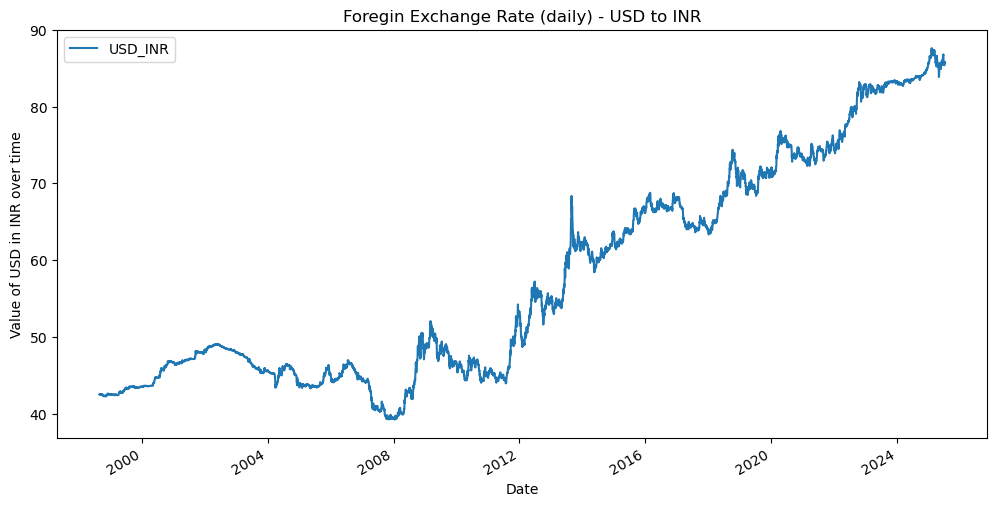

In [100]:
df.plot(kind = 'line', figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Value of USD in INR over time')
plt.title('Foregin Exchange Rate (daily) - USD to INR')
plt.savefig('Foreign Exchange Rate - USD to INR.png')
plt.show()

**_Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [101]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  1403


,USD_INR
Date,
1998-08-30,42.523633
1998-09-06,42.537800
1998-09-13,42.525150
1998-09-20,42.497880
1998-09-27,42.522080


**_Plotting the line graph of the weekly dataset_**

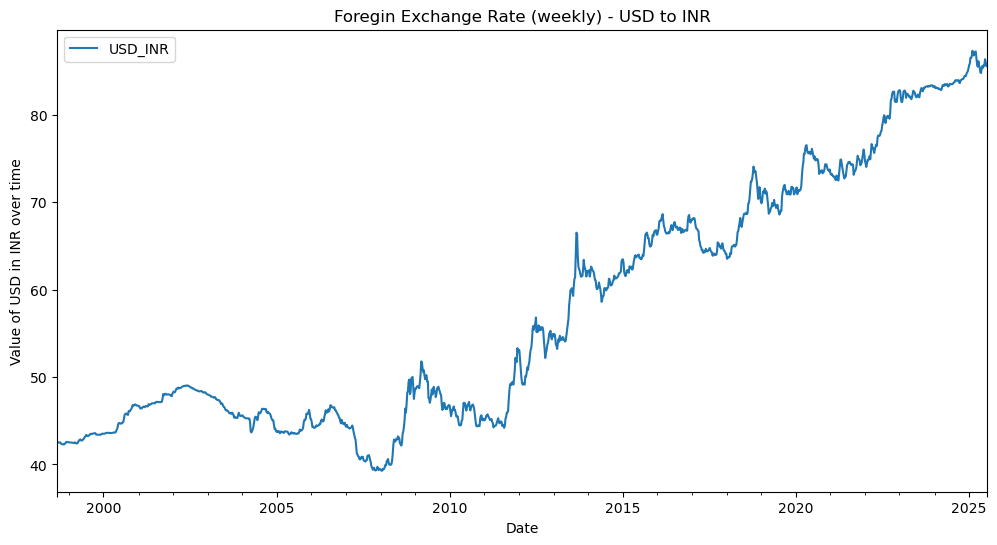

In [102]:
df_week.plot(kind = 'line', figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Value of USD in INR over time')
plt.title('Foregin Exchange Rate (weekly) - USD to INR')
plt.savefig('Foreign Exchange Rate(weekly) - USD to INR.png')
plt.show()

**_Resampling the dataset to Monthly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [103]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  324


,USD_INR
Date,
1998-08-31,42.523633
1998-09-30,42.517828
1998-10-31,42.331824
1998-11-30,42.381520
1998-12-31,42.549264


**_Plotting the line graph of the weekly dataset_**

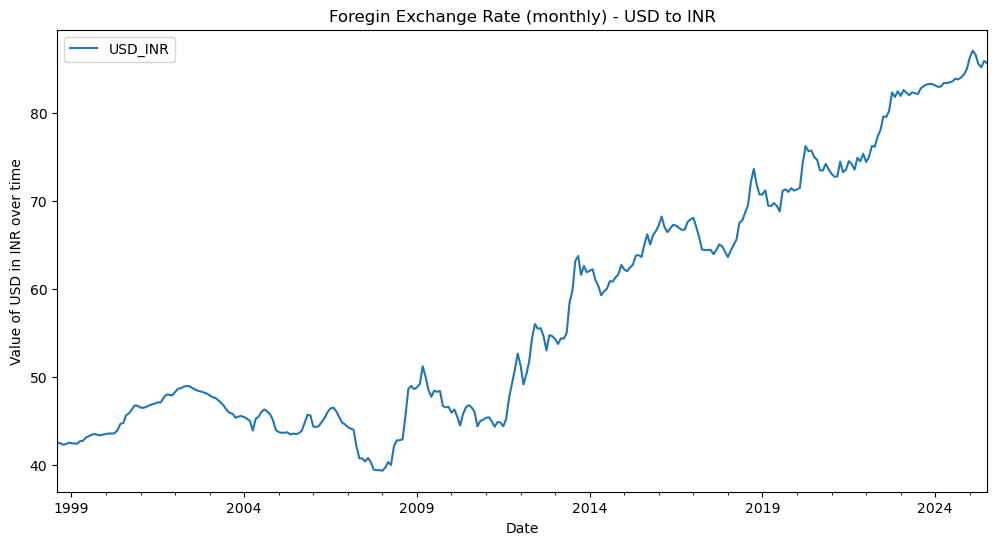

In [104]:
df_month.plot(kind = 'line', figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Value of USD in INR over time')
plt.title('Foregin Exchange Rate (monthly) - USD to INR')
plt.savefig('Foreign Exchange Rate(monthly) - USD to INR.png')
plt.show()

**_Resampling the dataset to Yearly frequency and along with that showing number of observation after resampling and displaying the first five record of resampled dataset_**

In [105]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  28


,USD_INR
Date,
1998-12-31,42.453087
1999-12-31,43.074530
2000-12-31,44.947727
2001-12-31,47.188368
2002-12-31,48.599231


**_Plotting the line graph of the yearly dataset_**

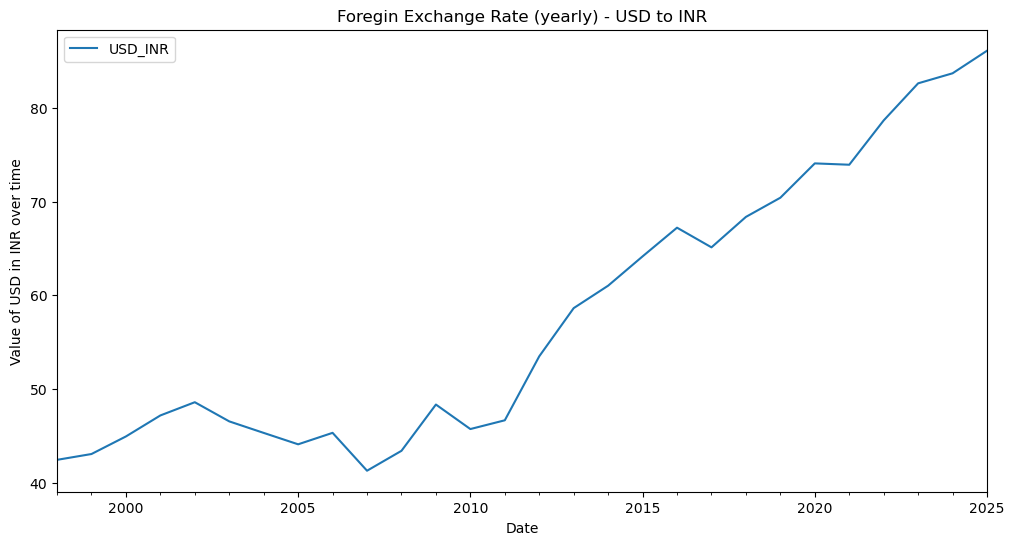

In [106]:
df_year.plot(kind = 'line', figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Value of USD in INR over time')
plt.title('Foregin Exchange Rate (yearly) - USD to INR')
plt.savefig('Foreign Exchange Rate(yearly) - USD to INR.png')
plt.show()

## By observing all the above resampled graph , weekly resampled data has more clear peak and perks among all resample data. Thus, the weekly dataset will be used for the Time Series Analysis and Predictions

**_Plotting the distribution plot using seaborn to show the data distribution in the resampled weekly dataset and saving the png file._**

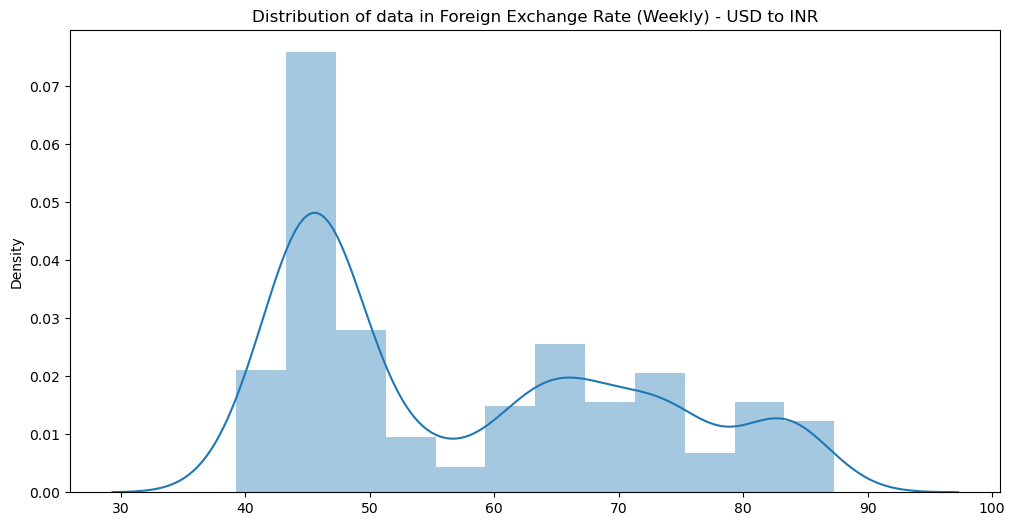

In [107]:
plt.figure(figsize = (12,6))
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - USD to INR')
plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - USD to INR.png')
plt.show()

**_Plotting the histogram and KDE line graph to show the distribution of data in the dataset and saving the graph as PNG File_**

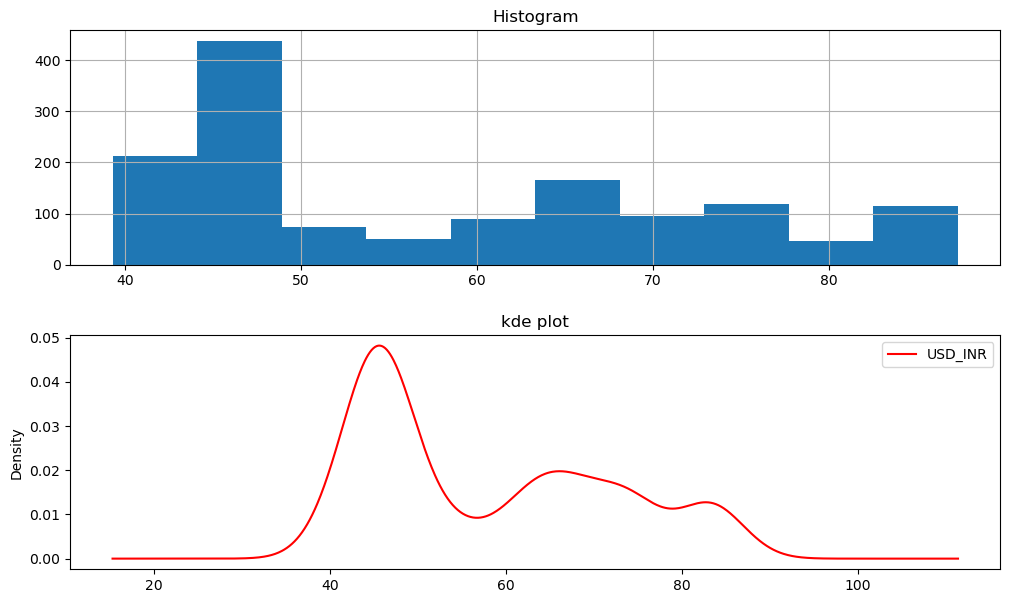

In [108]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (12,7))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
ax1.set_title('Histogram')
ax2.set_title('kde plot')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

The overall distribution is **_not normal_** — it's **_right-skewed_**, indicating a drift in the INR's value over time.

**_Plotting the graph with Seasonal Decomposition function to show the data Discription ,Trend , Seasonal , Residuals._**

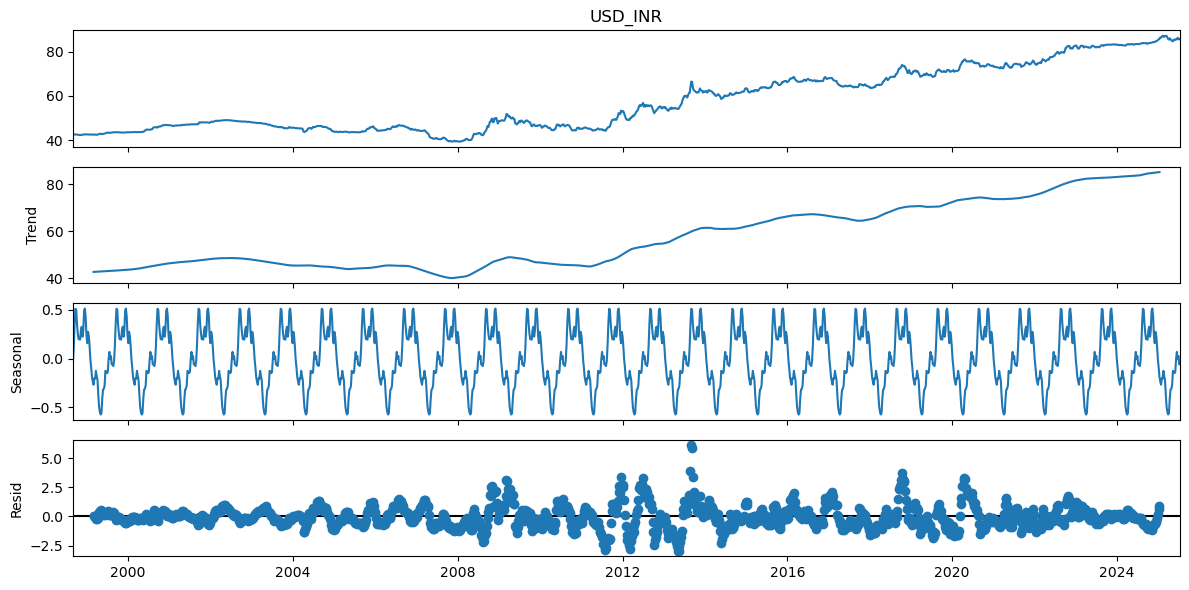

In [109]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week['USD_INR'], model = 'additive', period = 52)
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

**_Plotting the graph with Partial Autocorrelation and Auto Correleation of the data from the dataset._**

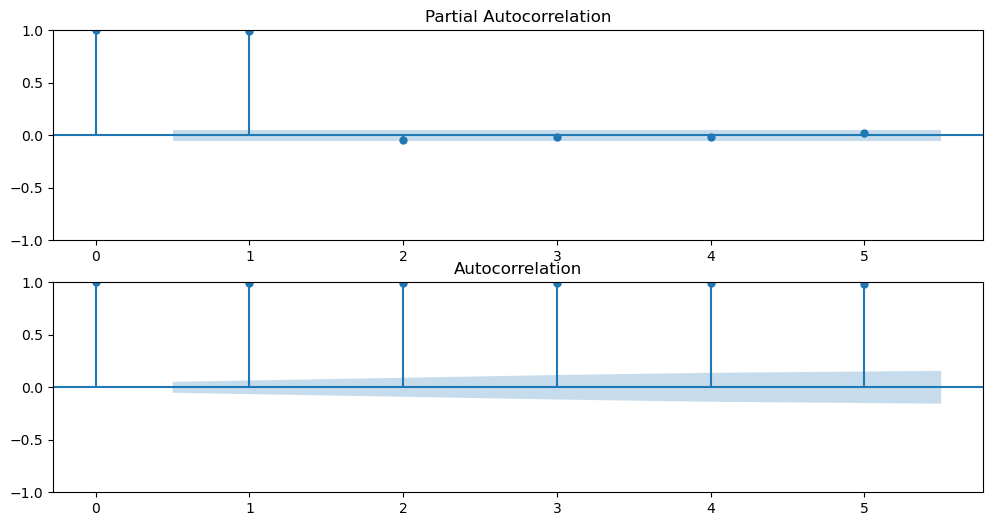

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False)
ax1 = plot_pacf(df_week, lags = 5, ax = ax1)
ax2 = plot_acf(df_week, lags = 5, ax = ax2)
plt.show()

## Data Transformation
The adf_check() function performs an **_Augmented Dickey-Fuller test_** on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.

In [32]:
def adf_check(time_series):
    result = adfuller(time_series, autolag = 'AIC')
    label = pd.Series(result[0:4], index = ['Test Statistics', 'p-value', 'Number of lags used', 'Number of Obsevations used'])
    for key, value in result[4].items():
        label['Critical Value (%s)' %key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is STATIONARY')
    else:
        print('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary')

In [33]:
adf_check(df_week)

Test Statistics                  0.490495
p-value                          0.984581
Number of lags used              7.000000
Number of Obsevations used    1395.000000
Critical Value (1%)             -3.435046
Critical Value (5%)             -2.863614
Critical Value (10%)            -2.567874
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary


**_Since the time series is not a stationary , the resampled weekly dataset is transformed as a new dataframe with 'first difference' to make it as a stationary series. Along with that showing number of observation in the new dataframe and displaying the first five record of the new data frame._**



In [34]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 1402


,USD_INR
Date,
1998-09-06,0.014167
1998-09-13,-0.012650
1998-09-20,-0.027270
1998-09-27,0.024200
1998-10-04,-0.012280


**_Performing the Augmented Dickey Fuller Test on the new transformed data in the resampled weekly dataset to find whether the time series is a stationary or not_**

In [35]:
adf_check(df1_week)

Test Statistics              -1.463762e+01
p-value                       3.666889e-27
Number of lags used           6.000000e+00
Number of Obsevations used    1.395000e+03
Critical Value (1%)          -3.435046e+00
Critical Value (5%)          -2.863614e+00
Critical Value (10%)         -2.567874e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is STATIONARY


After first differencing, the series got Stationary, thus we can now perform our Time Series Analysis

**_Plotting the line graph to show the data trend in the transformed data from the resampled weekly dataset_**

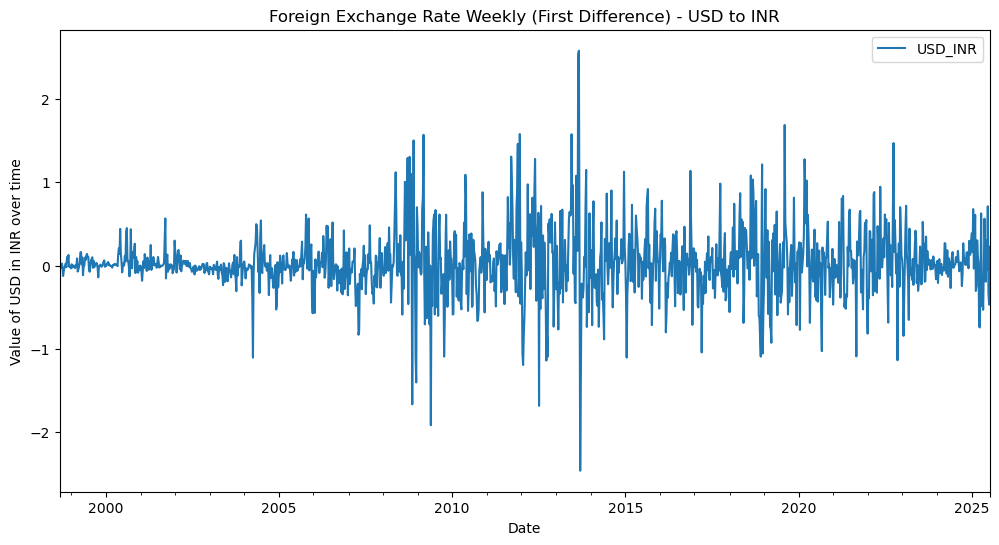

In [36]:
df1_week.plot(kind = 'line', figsize = (12,6))
plt.xlabel('Date')
plt.ylabel('Value of USD in INR over time')
plt.title('Foreign Exchange Rate Weekly (First Difference) - USD to INR')
plt.savefig('Foreign Exchange Rate Weekly (First Difference) - USD to INR.png')
plt.show()

**_Plotting the graph with pandas auto-correlation plot to show the difference between the stationary data and non - stationary data and saving it as png file._**

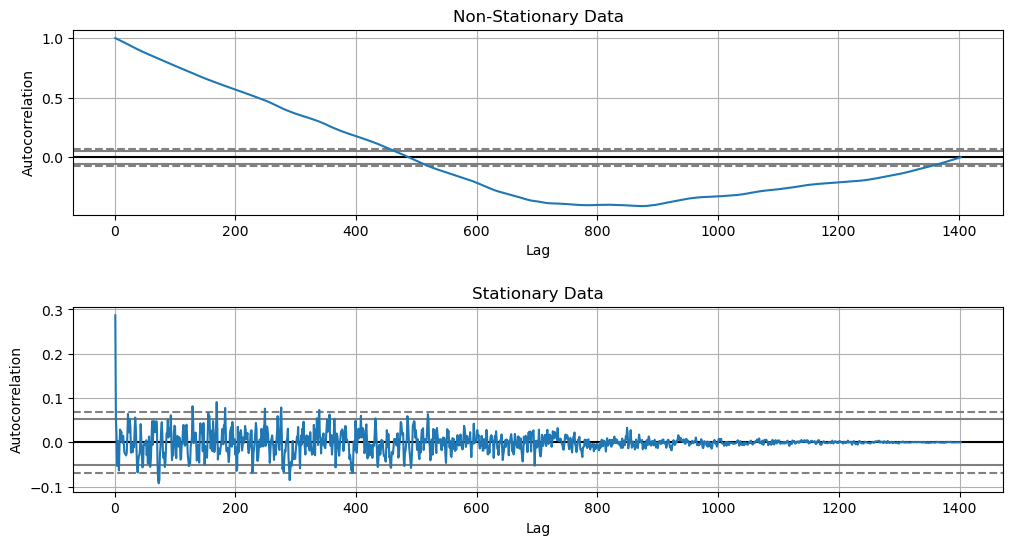

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows = 2,ncols = 1, sharex = False, sharey = False, figsize = (12,6))
ax1 = autocorrelation_plot(df_week, ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week, ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Non-Stationary data and Stationary data.png')
plt.show()

## _Model Fitting_
**_Getting the p value and q value for the model fitting using `auto_arima` function by passing through some needed parameters , the best model is evaluated by least Akaike Information Criterion (AIC)_**

In [38]:
model = auto_arima(df_week, m=52, d=1, seasonal=False, max_order = 8, test='adf', trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1249.098, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1366.961, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1248.762, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1249.131, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1373.556, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1249.338, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1249.066, Time=0.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1247.334, Time=1.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1248.936, Time=2.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1250.690, Time=1.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1250.993, Time=0.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1250.800, Time=4.90 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1250.323, Time=0.89 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 17.696 seconds


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1403
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -618.667
Date:                Thu, 17 Jul 2025   AIC                           1247.334
Time:                        14:14:56   BIC                           1273.562
Sample:                    08-30-1998   HQIC                          1257.138
                         - 07-13-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0392      0.018      2.195      0.028       0.004       0.074
ar.L1         -0.4383      0.150     -2.928      0.003      -0.732      -0.145
ar.L2          0.1693      0.053      3.224      0.001       0.066       0.272
ma.L1          0.7398      0.146      5.055      0.000       0.453       1.027
sigma2         0.1415      0.003     47.896      0.000       0.136       0.147
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1623.31
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.42   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**_Fitting the model in ARIMA Model with the Best value got from the `auto_arima` in the training data and getting the summary of the fitted model._**

In [40]:
model = ARIMA(df_week , order = (2,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                USD_INR   No. Observations:                 1403
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -621.162
Date:                Thu, 17 Jul 2025   AIC                           1250.323
Time:                        14:14:57   BIC                           1271.306
Sample:                    08-30-1998   HQIC                          1258.166
                         - 07-13-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4403      0.149     -2.952      0.003      -0.733      -0.148
ar.L2          0.1756      0.052      3.345      0.001       0.073       0.278
ma.L1          0.7458      0.145      5.130      0.000       0.461       1.031
sigma2         0.1420      0.003     48.051      0.000       0.136       0.148
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1620.86
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               5.60   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**_Plotting the diagnostic plot for the fitted model to show the best fit of the model and saving it as png file_**

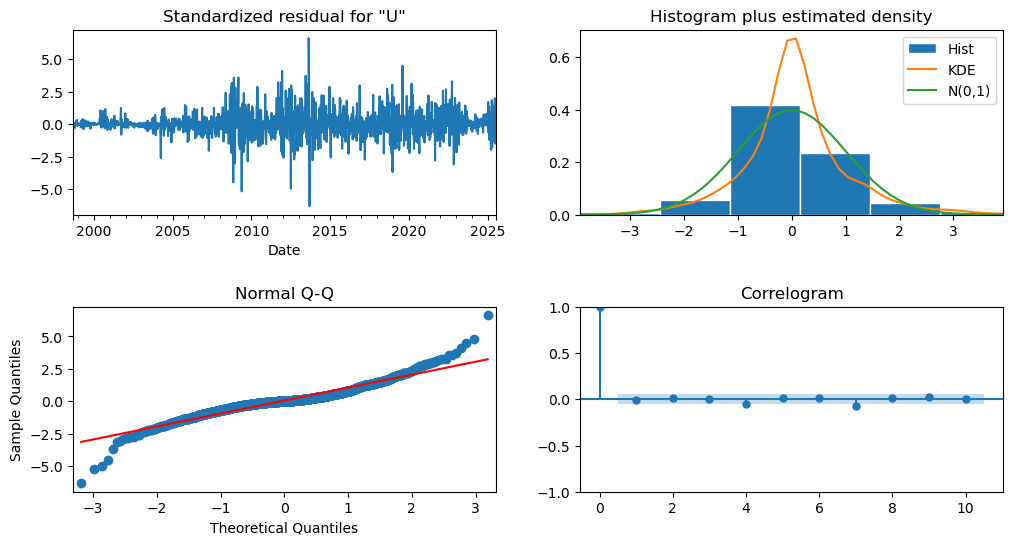

In [41]:
result.plot_diagnostics(figsize = (12,6))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

**_Predicting the value using fitted model with whole resampled weekly data._**

In [42]:
predictions = result.predict(typ = 'levels')
predictions

Date
1998-08-30     0.000000
1998-09-06    42.523635
1998-09-13    42.541921
1998-09-20    42.520745
1998-09-27    42.490649
                ...    
2025-06-15    85.791974
2025-06-22    85.593911
2025-06-29    86.588232
2025-07-06    85.864724
2025-07-13    85.465827
Freq: W-SUN, Name: predicted_mean, Length: 1403, dtype: float64

## _Model Evaluation_
**_Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and whole data value._**

In [43]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['USD_INR'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['USD_INR'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['USD_INR'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['USD_INR'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['USD_INR'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 99.28 % 

Mean Squared Error :  1.430763213827355 

Mean Absolute Error :  0.27717099958491465 

Root Mean Squared Error :  1.1961451474747347 

Mean Absolute Percentage Error : 0.50 %


## _Result_
**_Concating the Resampled weekly dataset and weekly first difference dataframe and the prediction value and naming the columns as `Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate` and exporting the dataframe to [Comma Seperated Value (CSV)] file. Also displaying the first five records of the exported dataframe._**

In [44]:
Final_data = pd.concat([df_week,df1_week,predictions], axis = 1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (USD to INR).csv')
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
Date,,,
1998-08-30,42.523633,NaN,0.000000
1998-09-06,42.537800,0.014167,42.523635
1998-09-13,42.525150,-0.012650,42.541921
1998-09-20,42.497880,-0.027270,42.520745
1998-09-27,42.522080,0.024200,42.490649


## _Model Testing_
**_Splliting the Resampled Weekly Dataset into training data and test data. Displaying the number of observations in both training data and test data._**

In [45]:
size = int(len(df_week)*0.80)
train, test = df_week[0:size]['USD_INR'], df_week[size:(len(df_week))]['USD_INR']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Test Data : ',test.shape[0])

Counts of Train Data :  1122
Counts of Test Data :  281


**_Creating the list of train dataset values in train_values and empty predictions list which will be appended after the prediction. Then fitting the model with ARIMA model with the best value got from auto_arima model in the train_values data and predicting with test data value and appending it to the predictions list and printing the comparison between predicted value and actual value_**

In [46]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 71.523975 , Actual = 71.848600
Predicted = 71.950281 , Actual = 73.124180
Predicted = 73.507956 , Actual = 74.001350
Predicted = 74.215414 , Actual = 74.508100
Predicted = 74.665262 , Actual = 75.529050
Predicted = 75.825848 , Actual = 75.519533
Predicted = 75.483944 , Actual = 76.129400
Predicted = 76.343947 , Actual = 76.480300
Predicted = 76.542164 , Actual = 76.514860
Predicted = 76.546017 , Actual = 75.827250
Predicted = 75.594830 , Actual = 75.623475
Predicted = 75.605610 , Actual = 75.574820
Predicted = 75.533893 , Actual = 75.766960
Predicted = 75.848845 , Actual = 75.668750
Predicted = 75.612559 , Actual = 75.477560
Predicted = 75.442156 , Actual = 75.671260
Predicted = 75.721733 , Actual = 76.103020
Predicted = 76.236153 , Actual = 75.727240
Predicted = 75.591244 , Actual = 75.389640
Predicted = 75.316639 , Actual = 74.971940
Predicted = 74.833295 , Actual = 75.241200
Predicted = 75.350790 , Actual = 74.808240
Predicted

**_Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and test data._**

In [47]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 99.41 % 

Mean Squared Error :  0.12311925813798927 

Mean Absolute Error :  0.252983419677702 

Root Mean Squared Error :  0.35088353928047017 

Mean Absolute Percentage Error : 0.32 %


**_Making the predicted value as series and index as same as Test Data index since the prediction is based on test data_**

In [48]:
predictions_df = pd.Series(prediction, index = test.index)
predictions_df.head()

Date
2020-03-01    71.523975
2020-03-08    71.950281
2020-03-15    73.507956
2020-03-22    74.215414
2020-03-29    74.665262
Freq: W-SUN, dtype: float64

**_Plotting the graph with predicted data and resampled weekly data index since the prediction is based on test data._**

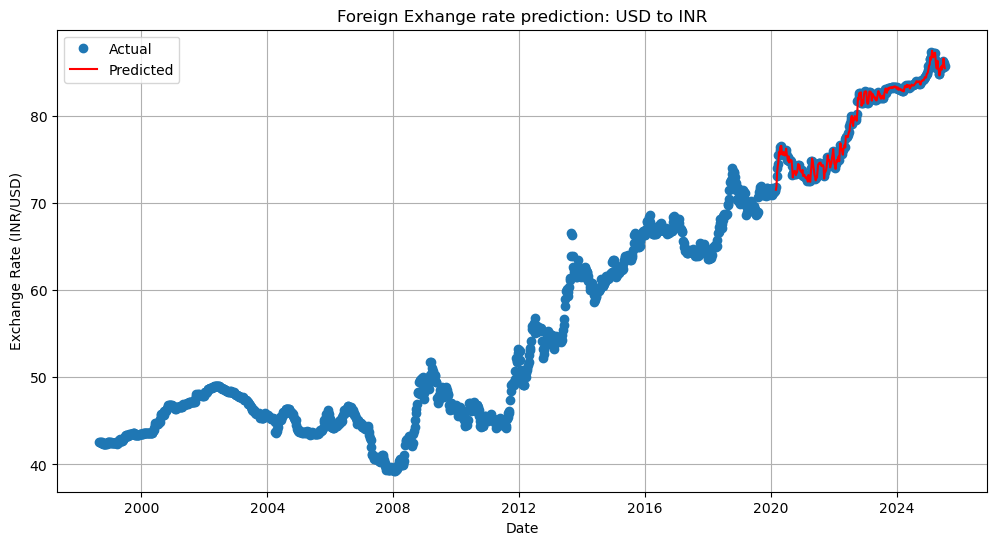

In [49]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title = 'Foreign Exhange rate prediction: USD to INR',  xlabel = 'Date', ylabel = 'Exchange Rate (INR/USD)')
ax.plot(df_week, 'o', label = 'Actual')
ax.plot(predictions_df, 'r', label = 'Predicted')
legend = ax.legend(loc = 'upper left')
legend.get_frame().set_facecolor('w')
plt.grid(True)
plt.savefig('Foreign Exchange Rate Prediction - USD to INR.png')
plt.show()

In [50]:
from arch import arch_model

In [51]:
df['log_return'] = 100 * np.log(df['USD_INR'] / df['USD_INR'].shift(1))
returns = df['log_return'].dropna()
# Convert to returns (log returns)

In [52]:
# GARCH(1,1) on the returns series
garch_model = arch_model(returns, vol='GARCH', p=1, q=1, mean='Constant', dist='normal')
garch_model_fit = garch_model.fit(disp='off')

In [53]:
garch_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -747.618
Distribution:                  Normal   AIC:                           1503.24
Method:            Maximum Likelihood   BIC:                           1530.35
                                        No. Observations:                 6497
Date:                Thu, Jul 17 2025   Df Residuals:                     6496
Time:                        14:18:24   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.3302e-03  1.924e-03      0.691      0.489 [-2.441e-03,5.102e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8964e-03  4.798e-04      6.037  1.570e-09 [1.956e-03,3.837e-03]
alpha[1]       0.2000  1.391e-02     14.382  6.672e-47     [  0.173,  0.227]
beta[1]        0.7800  1.583e-02     49.259      0.000     [  0.749,  0.811]
============================================================================

Covariance estimator: robust
"""

In [54]:
# Forecast volatility for the next 10 steps
forecast = garch_model_fit.forecast(horizon=10)

In [55]:
forecast.variance[-1:]

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2025-07-09,0.068315,0.069845,0.071344,0.072814,0.074254,0.075665,0.077048,0.078404,0.079732,0.081034


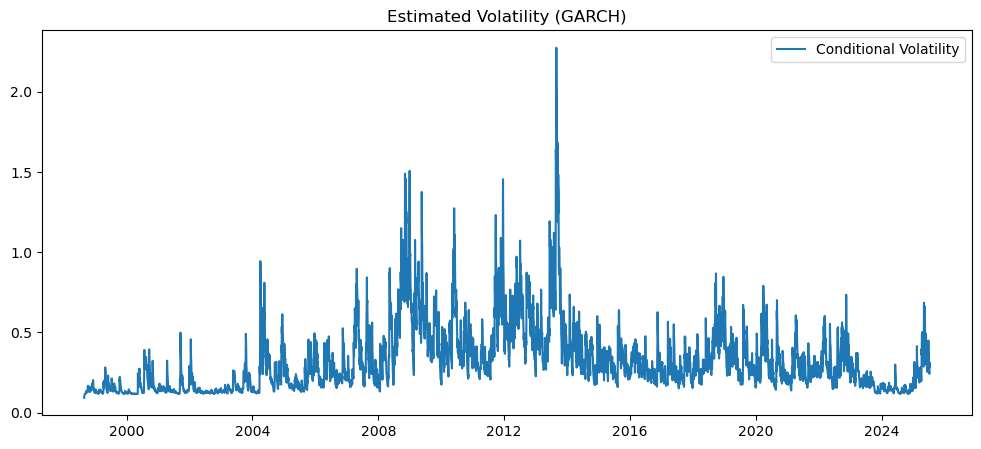

In [56]:
df['volatility'] = garch_model_fit.conditional_volatility
plt.figure(figsize=(12,5))
plt.plot(df['volatility'], label='Conditional Volatility')
plt.title('Estimated Volatility (GARCH)')
plt.legend()
plt.show()

In [57]:
garch_model = arch_model(returns, vol='GARCH', p=1, q=1, mean='Constant', dist='normal')  # Use your optimal (p,d,q)
garch_model_fit = garch_model.fit()
# Forecast 52 future time points (1 year weekly)
garch_forecast = garch_model_fit.forecast(horizon = 52)
garch_forecast

Iteration:      1,   Func. Count:      6,   Neg. LLF: 40294775.54887011
Iteration:      2,   Func. Count:     16,   Neg. LLF: 747.618491450893
Optimization terminated successfully    (Exit mode 0)
            Current function value: 747.6184975175906
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


In [58]:
print(garch_forecast)

In [59]:
# Print mean (conditional mean) forecasts
print("Mean Forecasts:")
print(garch_forecast.mean)

# Print variance forecasts
print("\nVariance Forecasts:")
print(garch_forecast.variance)

# Print standard deviation (volatility) forecasts
print("\nVolatility Forecasts:")
print(np.sqrt(garch_forecast.variance))

Mean Forecasts:
               h.01     h.02     h.03     h.04     h.05     h.06     h.07  \
Date                                                                        
2025-07-09  0.00133  0.00133  0.00133  0.00133  0.00133  0.00133  0.00133   

               h.08     h.09     h.10  ...     h.43     h.44     h.45  \
Date                                   ...                              
2025-07-09  0.00133  0.00133  0.00133  ...  0.00133  0.00133  0.00133   

               h.46     h.47     h.48     h.49     h.50     h.51     h.52  
Date                                                                       
2025-07-09  0.00133  0.00133  0.00133  0.00133  0.00133  0.00133  0.00133  

[1 rows x 52 columns]

Variance Forecasts:
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2025-07-09  0.068315  0.069845  0.071344  0.072814  0.074254  0.075665   

                h.07      h.08      h

**_Predictions for future dates(weekly basis)_**

In [76]:
model = ARIMA(df_week['USD_INR'], order=(2,1,1))  # Use your optimal (p,d,q)
model_fit = model.fit()
# Forecast 52 future time points (1 year weekly)
forecast_steps = 52
forecast = model_fit.forecast(steps=forecast_steps)
forecast

2025-07-20    85.827646
2025-07-27    85.845155
2025-08-03    85.846296
2025-08-10    85.848868
2025-08-17    85.847935
2025-08-24    85.848797
2025-08-31    85.848254
2025-09-07    85.848645
2025-09-14    85.848377
2025-09-21    85.848564
2025-09-28    85.848435
2025-10-05    85.848524
2025-10-12    85.848462
2025-10-19    85.848505
2025-10-26    85.848475
2025-11-02    85.848496
2025-11-09    85.848482
2025-11-16    85.848492
2025-11-23    85.848485
2025-11-30    85.848490
2025-12-07    85.848486
2025-12-14    85.848488
2025-12-21    85.848487
2025-12-28    85.848488
2026-01-04    85.848487
2026-01-11    85.848488
2026-01-18    85.848487
2026-01-25    85.848488
2026-02-01    85.848487
2026-02-08    85.848488
2026-02-15    85.848488
2026-02-22    85.848488
2026-03-01    85.848488
2026-03-08    85.848488
2026-03-15    85.848488
2026-03-22    85.848488
2026-03-29    85.848488
2026-04-05    85.848488
2026-04-12    85.848488
2026-04-19    85.848488
2026-04-26    85.848488
2026-05-03    85

## Plotting the forecast line along with the current data set

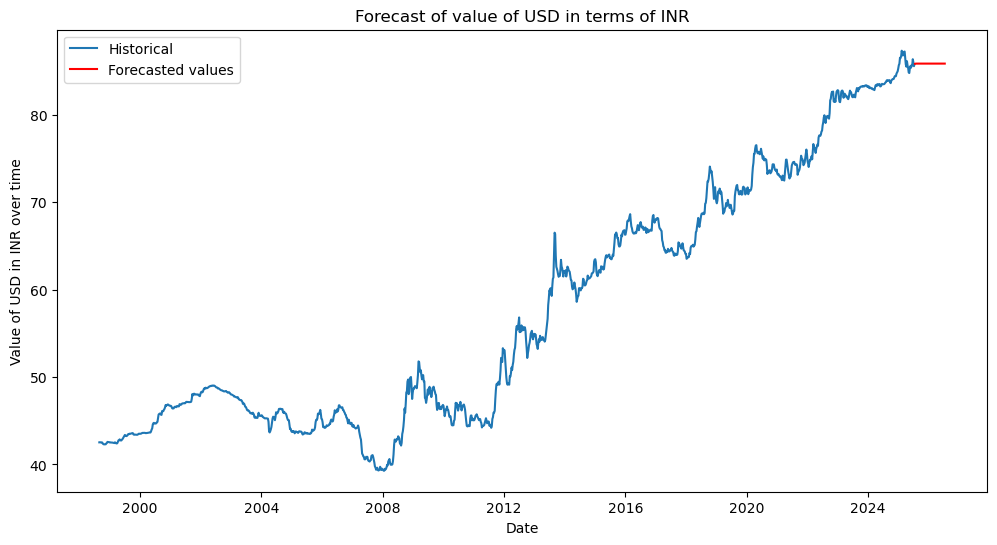

In [77]:
plt.figure(figsize = (12,6))
plt.plot(df_week.index, df_week['USD_INR'], label = 'Historical' )
plt.plot(forecast.index, forecast, label = 'Forecasted values', color = 'red')
plt.title('Forecast of value of USD in terms of INR')
plt.xlabel('Date')
plt.ylabel('Value of USD in INR over time')
plt.legend()
plt.show()

**_The forecast values using ARIMA model are flatten out as it assumes that the series will revert to its long-run mean over time
For longer horizons, forecasts converge to a constant value (usually the historical mean)
The ARIMA(2,1,1) model is essentially saying "after accounting for recent patterns, the series will return to trend"_**

**_Using Exponential Smoothing for forecasting long term future values_**

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [74]:
es_model = ExponentialSmoothing(df_week['USD_INR'], trend='add', seasonal='add', seasonal_periods=52)
fit = es_model.fit()
forecast = fit.forecast(52)
forecast

2025-07-20    85.787144
2025-07-27    85.871373
2025-08-03    86.054883
2025-08-10    86.302807
2025-08-17    86.481771
2025-08-24    86.505849
2025-08-31    86.396273
2025-09-07    86.332132
2025-09-14    86.302501
2025-09-21    86.330093
2025-09-28    86.358621
2025-10-05    86.484761
2025-10-12    86.547055
2025-10-19    86.483084
2025-10-26    86.577740
2025-11-02    86.806891
2025-11-09    86.857874
2025-11-16    86.808213
2025-11-23    86.650233
2025-11-30    86.603567
2025-12-07    86.746442
2025-12-14    86.733230
2025-12-21    86.659428
2025-12-28    86.563161
2026-01-04    86.513172
2026-01-11    86.448630
2026-01-18    86.493177
2026-01-25    86.487941
2026-02-01    86.590418
2026-02-08    86.638643
2026-02-15    86.733831
2026-02-22    86.703228
2026-03-01    86.703182
2026-03-08    86.593391
2026-03-15    86.505399
2026-03-22    86.455902
2026-03-29    86.432636
2026-04-05    86.465297
2026-04-12    86.660852
2026-04-19    86.763556
2026-04-26    86.790055
2026-05-03    86

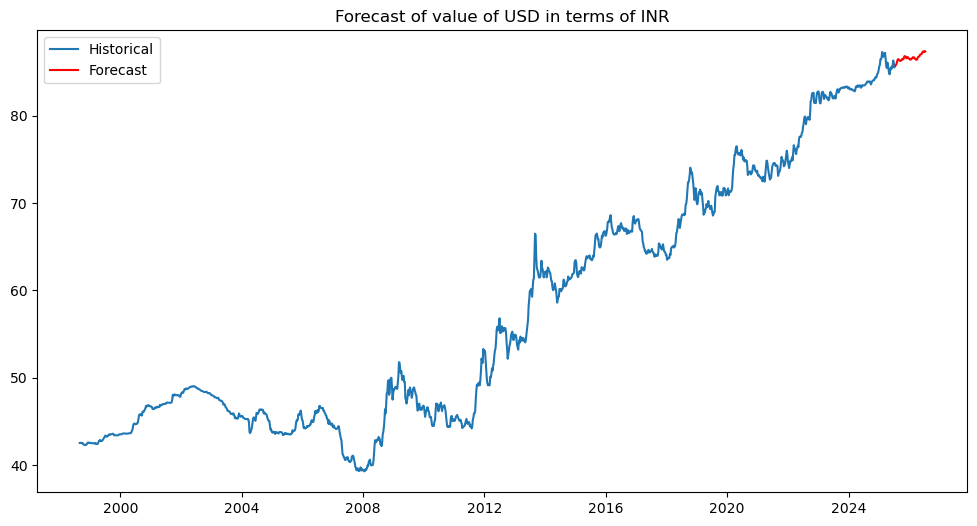

In [64]:
plt.figure(figsize=(12,6))
plt.plot(df_week.index, df_week['USD_INR'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Forecast of value of USD in terms of INR')
plt.legend()
plt.show()

**_Hybrid model consisting of both Exponential Smoothing and GARCH model for future forecasting_**

2025-07-20    85.787144
2025-07-27    85.871373
2025-08-03    86.054883
2025-08-10    86.302807
2025-08-17    86.481771
2025-08-24    86.505849
2025-08-31    86.396273
2025-09-07    86.332132
2025-09-14    86.302501
2025-09-21    86.330093
2025-09-28    86.358621
2025-10-05    86.484761
2025-10-12    86.547055
2025-10-19    86.483084
2025-10-26    86.577740
2025-11-02    86.806891
2025-11-09    86.857874
2025-11-16    86.808213
2025-11-23    86.650233
2025-11-30    86.603567
2025-12-07    86.746442
2025-12-14    86.733230
2025-12-21    86.659428
2025-12-28    86.563161
2026-01-04    86.513172
2026-01-11    86.448630
2026-01-18    86.493177
2026-01-25    86.487941
2026-02-01    86.590418
2026-02-08    86.638643
2026-02-15    86.733831
2026-02-22    86.703228
2026-03-01    86.703182
2026-03-08    86.593391
2026-03-15    86.505399
2026-03-22    86.455902
2026-03-29    86.432636
2026-04-05    86.465297
2026-04-12    86.660852
2026-04-19    86.763556
2026-04-26    86.790055
2026-05-03    86

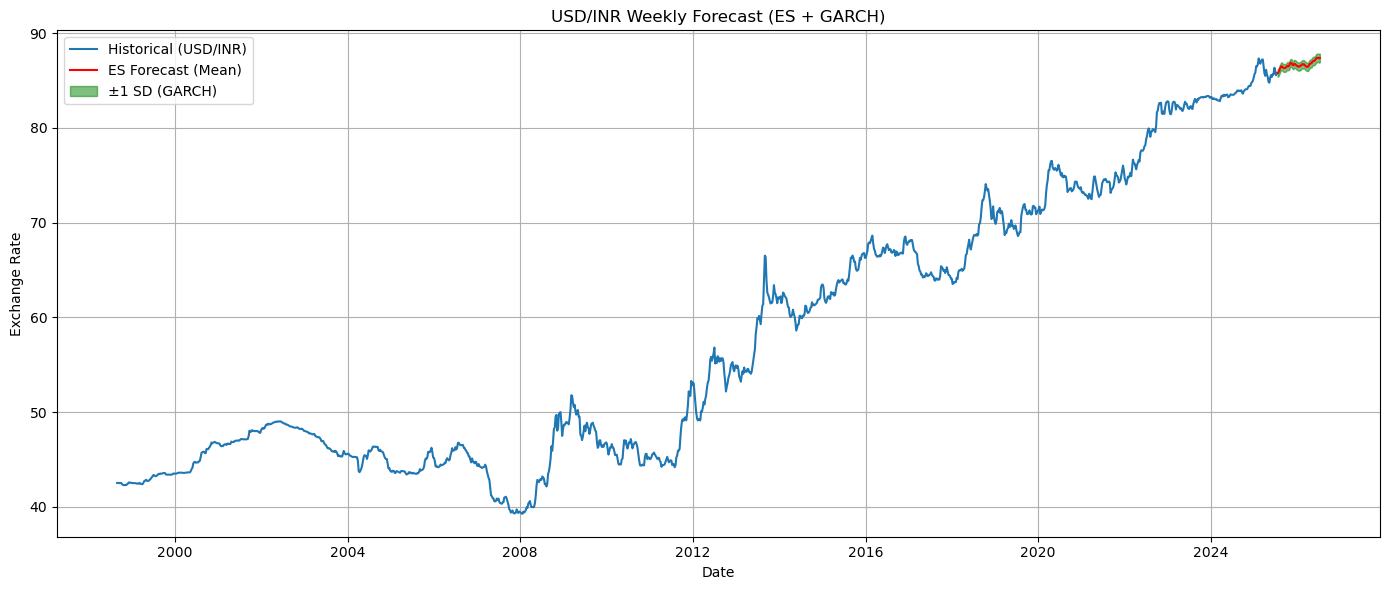

In [78]:
data = df_week['USD_INR']

es_model = ExponentialSmoothing(
    data,
    trend='add',
    seasonal='add',
    seasonal_periods=52  
)

es_fit = es_model.fit()
es_fitted = es_fit.fittedvalues
residuals = data - es_fitted

residuals = residuals.dropna()
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Forecasting

forecast_horizon = 52  

es_forecast = es_fit.forecast(steps=forecast_horizon)

# Forecast variance from GARCH
garch_forecast = garch_fit.forecast(horizon=forecast_horizon)
variance_forecast = garch_forecast.variance.values[-1]
std_forecast = np.sqrt(variance_forecast)

# Forecast dates (weekly)
last_date = data.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=forecast_horizon, freq='W')
es_forecast.index = forecast_index

print(es_forecast)

# Plotting

plt.figure(figsize=(14, 6))
plt.plot(data, label='Historical (USD/INR)')
plt.plot(es_forecast, label='ES Forecast (Mean)', color='red')
plt.fill_between(
    es_forecast.index,
    es_forecast - std_forecast,
    es_forecast + std_forecast,
    color='green', alpha=0.5, label='±1 SD (GARCH)'
)
plt.title('USD/INR Weekly Forecast (ES + GARCH)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()